In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train[1]
y_train[1]

0

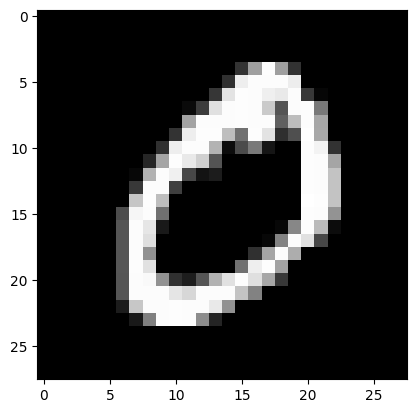

In [ ]:
plt.imshow(x_train[1], cmap = "gray")

## 2D Visualization using PCA

In [ ]:
x = []
for i in range(x_train.shape[0]):
  x.append(x_train[i].flatten())

In [ ]:
x1 = []
for i in range(x_test.shape[0]):
  x1.append(x_test[i].flatten())

In [ ]:
type(x)

list

In [ ]:
x = np.array(x)
x1 = np.array(x1)

In [ ]:
x.shape

(60000, 784)

In [ ]:
new_x = x
new_x1 = x1
new_y = y_train
new_y1 = y_test

In [ ]:
new_x.shape

(60000, 784)

In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(new_x)
print(standardized_data.shape)

(60000, 784)


In [ ]:
# standardized_data[1]

## Classification Using KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# new_x_train = standardized_data

In [ ]:
# standardized_x_test_data = StandardScaler().fit_transform(new_x1)

In [ ]:
# KNN_x_test = standardized_x_test_data

In [ ]:
# from sklearn.model_selection import train_test_split
# KNN_x_train, KNN_x_cv, KNN_y_train, KNN_y_cv = train_test_split(new_x,new_y, random_state = 42, test_size = 0.25, shuffle = True)

In [ ]:
# neigh.fit(KNN_x_train, KNN_y_train)

In [ ]:
# from sklearn import metrics
# pred = neigh.predict(KNN_x_cv)
# accuracy = metrics.accuracy_score(KNN_y_cv,pred)
# print(accuracy)

In [ ]:
sample_data = standardized_data

covar_matrix = np.matmul(sample_data.T, sample_data)

print("The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [ ]:
from scipy.linalg import eigh

values, vectors = eigh(covar_matrix, eigvals=(754,783))

# print(values)

# print(vectors)

print("Shape of eigen vectors =", vectors.shape)

vectors = vectors.T

print("Updated shape of eigen vectors =",vectors.shape)




<ipython-input-24-a7e3b8f406a1>:3: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covar_matrix, eigvals=(754,783))


Shape of eigen vectors = (784, 30)
Updated shape of eigen vectors = (30, 784)


In [ ]:
new_coordinates = np.matmul(vectors, sample_data.T)

print("resultant new data points shape", vectors.shape, "x", sample_data.T.shape," = ", new_coordinates.shape)

resultant new data points shape (30, 784) x (784, 60000)  =  (30, 60000)


In [ ]:
labels = y_train

In [ ]:
new_coordinates = np.vstack((new_coordinates, labels)).T
print(new_coordinates.shape)

(60000, 31)


In [ ]:
new_coordinates[0]

array([-0.26522885, -0.5374337 ,  5.05207034,  0.73732579,  3.06724264,
        2.65313975, -2.63645001,  2.31951178, -1.19216754,  5.07765877,
        3.82120323,  4.18016626, -5.21222848, -7.51168936, -1.64330835,
        4.4197226 , -9.200882  , -1.18377815,  3.16268621, -1.52038037,
        2.32420709, -1.05231433, -1.39347313, -0.33613933, -0.95161561,
       -0.9853473 ,  8.0513293 , -0.06755984, -4.81479035, -0.92215881,
        5.        ])

## Using KNN

In [ ]:
x = new_coordinates[:,:-1]
y = new_coordinates[:,-1]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# for k in range(7):
neigh = KNeighborsClassifier(n_neighbors=3)


In [ ]:
from sklearn.model_selection import train_test_split
KNN_x_train, KNN_x_cv, KNN_y_train, KNN_y_cv = train_test_split(x,y, random_state = 42, test_size = 0.25, shuffle = True)

In [ ]:
neigh.fit(KNN_x_train, KNN_y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn import metrics
pred = neigh.predict(KNN_x_cv)
accuracy = metrics.accuracy_score(KNN_y_cv,pred)
print(accuracy)

0.9538666666666666


In [ ]:
# dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
# print(dataframe.head())

In [ ]:
# import seaborn as sns
# sns.FacetGrid(dataframe, hue="label").map(plt.scatter, '1st_principal', '2nd_principal', s= 6).add_legend()
# plt.show()

## PCA using Scikit-learn

In [ ]:
# from sklearn import decomposition
# pca = decomposition.PCA()

In [ ]:
# pca.n_components =14
# pca_data = pca.fit_transform(sample_data)

# print("shape of pca_reduced.shape =", pca_data.shape)

In [ ]:
# pca_data = np.vstack((pca_data.T, labels)).T

# pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
# sns.FacetGrid(pca_df, hue="label").map(plt.scatter, '1st_principal', '2nd_principal', s= 6).add_legend()
# plt.show()

## PCA for dimensionality reduction(non-visualization)

In [ ]:
# pca.n_components = 784
# pca_data = pca.fit_transform(sample_data)

# percentage_var_explained = pca.explained_variance_/ np.sum(pca.explained_variance_)

# cum_var_explained = np.cumsum(percentage_var_explained)

# plt.figure(1, figsize=(6,4))

# plt.clf()
# plt.plot(cum_var_explained, linewidth=2)
# plt.axis('tight')
# plt.grid()
# plt.xlabel('n_compontents')
# plt.ylabel('Cumulative_explained_varience')
# plt.show()

In [ ]:
# print(cum_var_explained[200])